In [10]:
from PIL import Image
import math

In [11]:
im = Image.open('baby_yoda.jpg')
print("tryb obrazu", im.mode)
print("rozmiar", im.size)


tryb obrazu RGB
rozmiar (409, 311)


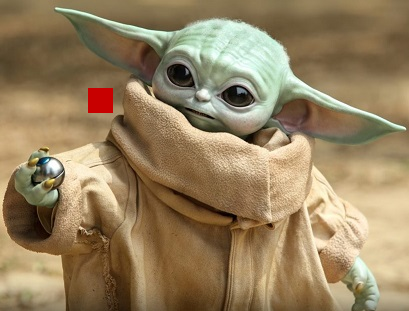

In [12]:
def rysuj_kwadrat_kolor(obraz, m, n, k, kolor): # m,n - srodek kwadratu, k - długość boku kwadratu, liczba nieparzysta
    obraz1 = obraz.copy()
    pix1 = obraz1.load()
    d = int(k/2)
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pix1[x, y] = kolor
    return obraz1


im1 = im.copy()
rysuj_kwadrat_kolor(im1, 100, 100, 25, (200,0,0))   

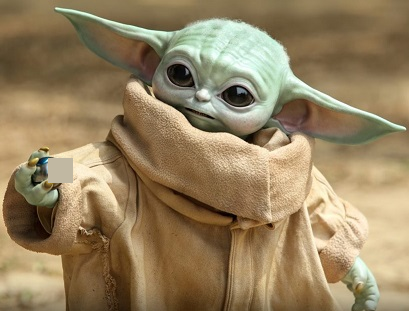

In [13]:
def rysuj_kwadrat_srednia(obraz, m, n, k): # m,n - srodek kwadratu, k - długość boku kwadratu
    obraz1 = obraz.copy()
    pix = obraz.load()
    pix1 = obraz1.load()
    d = int(k/2)
    temp = [0,0,0]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pixel = pix[x, y]
            temp[0] += pixel[0] 
            temp[1] += pixel[1] 
            temp[2] += pixel[2] 
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pix1[x, y] = (int(temp[0]/k**2), int(temp[1]/k**2), int(temp[2]/k**2))
    return obraz1
    
im2 = im.copy()
rysuj_kwadrat_srednia(im2, 60, 170, 25) 

In [14]:
def zakres(w, h):  
    return [(i, j) for i in range(w) for j in range(h)]

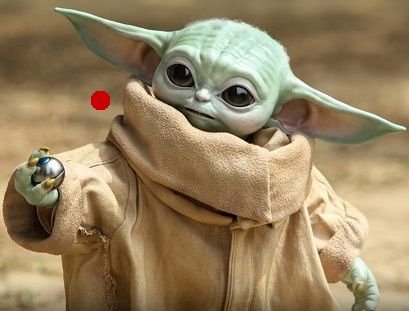

In [15]:

def rysuj_kolo(obraz, m_s, n_s, r, kolor):
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w, h):
        if (i-m_s)**2+(j-n_s)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
            obraz1.putpixel((i,j), kolor)
    return obraz1

im3 = im.copy()
im4 = rysuj_kolo(im3, 100, 100, 10, (200,0,0))
im4

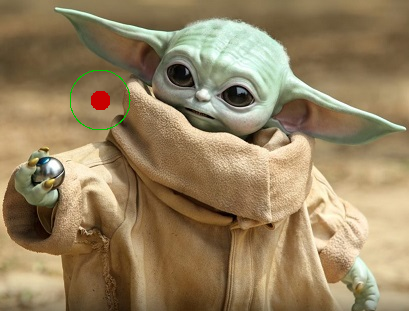

In [16]:
def rysuj_okrag(obraz, a, b ,r, kolor):
    obraz1 = obraz.copy()
    w,h = obraz.size
    for angle in range(0,360,1):
        y = int(r * math.sin(angle) + a)
        x = int(r * math.cos(angle) + b)
        if x < w and y < h:
            obraz1.putpixel((x,y), kolor)
    return obraz1

rysuj_okrag(im4, 100, 100, 30, (0, 200,0))

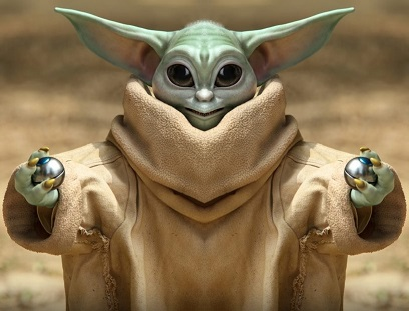

In [17]:
def odbij_lewa_strone_na_prawo(im):
    img = im.copy()
    w, h = im.size
    w1 = int(w / 2)
    px = img.load()
    for i in range(w1, w):
        for j in range(h):
            px[i, j] = px[w -1- i, j]
    return img

odbij_lewa_strone_na_prawo(im)

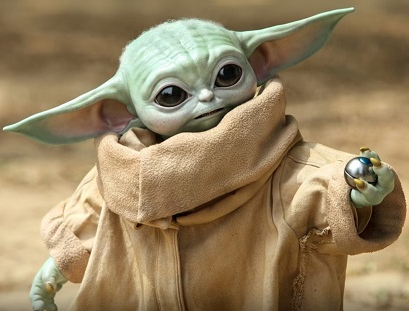

In [18]:
def odbij_w_pionie(im):
    px0 = im.load()
    img = im.copy()
    w, h = im.size
    px = img.load()
    for i in range(w):
        for j in range(h):
            px[i, j] = px0[w - 1- i, j]
    return img
odbij_w_pionie(im)